In [1]:
#1 Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score


In [2]:
#2️ Data Download
df = pd.read_csv(r"C:\Users\Admin\OneDrive\سطح المكتب\Progect\IBM\House_Sales_in_King_Count_USA\kc_house_data.csv")


In [3]:
#3️ Display data types for each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
#4️ Delete unnecessary columns and obtain a statistical summary.
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True, errors='ignore')
print(df.describe())
print(df.columns)


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [8]:
# 5 - Count the number of houses by the number of floors
floor_counts = df['floors'].value_counts().to_frame()
print(floor_counts)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


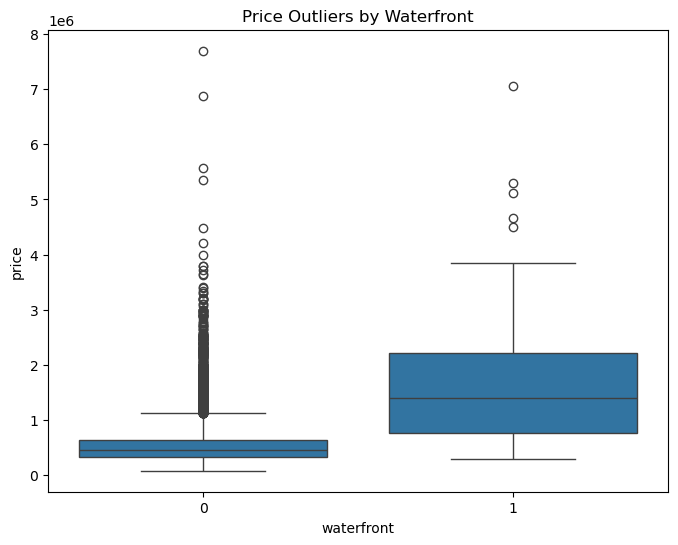

In [9]:

# 6️ Boxplot for identifying outliers by Waterfront

plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title("Price Outliers by Waterfront")
plt.show()


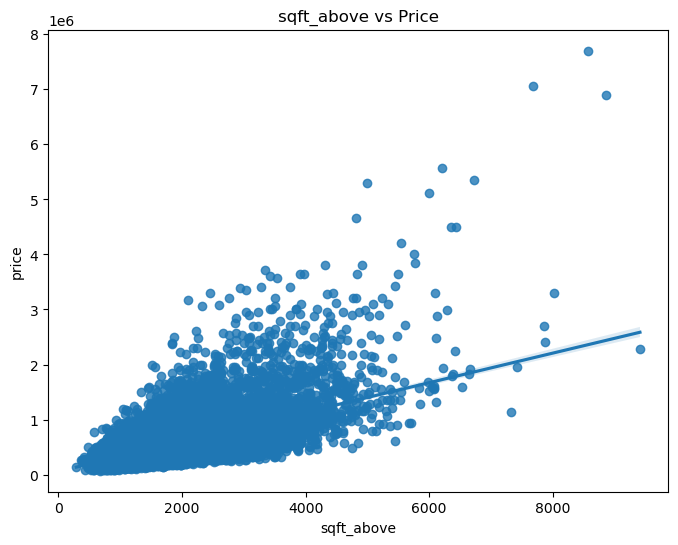

In [23]:
# 7  regplot between sqft_above and price
plt.figure(figsize=(8,6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.title("sqft_above vs Price")
plt.show()



In [22]:
# 8 Linear Regression on sqft_living
X = df[['sqft_living']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("\nR^2 (Linear Regression on sqft_living):", r2)



R^2 (Linear Regression on sqft_living): 0.49406905389089006


In [21]:
# 9 Linear Regression has a multi-feature list.
features = ["floors","waterfront","lat","bedrooms","sqft_basement",
            "view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("\nR^2 (Linear Regression on multiple features):", r2)



R^2 (Linear Regression on multiple features): 0.6614781405487553


In [20]:
#10 Pipeline with PolynomialFeatures + LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("\nR^2 (Polynomial Regression with Pipeline):", r2)



R^2 (Polynomial Regression with Pipeline): 0.7110624534594425


In [19]:
#11 Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("\nR^2 (Ridge Regression):", r2)



R^2 (Ridge Regression): 0.6614734596866669


In [18]:
#12 Ridge Regression + Polynomial Transform
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)
y_pred = ridge_poly.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print("\nR^2 (Ridge + Polynomial):", r2)


R^2 (Ridge + Polynomial): 0.7003486869127693
